In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dropout, Embedding
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv("/content/gdrive/MyDrive/MTech-project/demo-dataset.csv")
data.head()

,target,tweet
0,0,Today in Selfcare beauty amp laughs Kung Fu Pa...
1,0,If this is your response to someone saying the...
2,0,Apparently you get a free pass just by mention...
3,0,When you will never again give birth to violen...
4,0,Aw man im outta pizza rolls


In [ ]:
data.shape

(4245, 2)

In [ ]:
#del data['Unnamed: 0']

In [ ]:
data.head()

,target,tweet
0,0,Today in Selfcare beauty amp laughs Kung Fu Pa...
1,0,If this is your response to someone saying the...
2,0,Apparently you get a free pass just by mention...
3,0,When you will never again give birth to violen...
4,0,Aw man im outta pizza rolls


In [ ]:
import os, sys
import re
import string
import itertools

In [ ]:
contraction_dict = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}

In [ ]:
def _get_contractions(contraction_dict):
    contraction_re = re.compile('(%s)' % '|'.join(contraction_dict.keys()))
    return contraction_dict, contraction_re

contractions, contractions_re = _get_contractions(contraction_dict)

def replace_contractions(text):
    def replace(match):
        return contractions[match.group(0)]
    return contractions_re.sub(replace, text)

In [ ]:
def tweet_clean(text):
    text = re.sub(r'https?:/\/\S+', ' ', text) # remove urls
    text = re.sub(r'<([^>]*)>', ' ', text) # remove emojis
    text = re.sub(r'@\w+', ' ', text) # remove at mentions
    text = re.sub(r'#', '', text) # remove hashtag symbol
    text = re.sub(r'[0-9]+', ' ', text) # remove numbers
    text = replace_contractions(text)
    pattern = re.compile(r"[ \n\t]+")
    text = pattern.sub(" ", text)      
    text = "".join("".join(s)[:2] for _, s in itertools.groupby(text))    
    text = re.sub(r'[^A-Za-z0-9,?.!]+', ' ', text) # remove all symbols and punctuation except for . , ! and ?
    return text.strip()

In [ ]:
cleaned1=lambda x:tweet_clean(x)
data['tweet']=pd.DataFrame(data.tweet.apply(cleaned1))

In [ ]:
data.head()

,target,tweet
0,0,Today in Selfcare beauty amp laughs Kung Fu Pa...
1,0,If this is your response to someone saying the...
2,0,Apparently you get a free pass just by mention...
3,0,When you will never again give birth to violen...
4,0,Aw man im outta pizza rolls


In [ ]:
data.target.value_counts()

0    2357
1    1888
Name: target, dtype: int64

In [ ]:
category = list(data['target'].unique())
labels = []
for i in data['target']:
    labels.append(category.index(i))
    
print(labels[:10])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
category = list(data['target'].unique())
print(category)

[0, 1]


In [ ]:
text = data['tweet'].tolist()

In [ ]:
token = Tokenizer()
token.fit_on_texts(text)
vocabs = token.index_word
vocabs_len = len(token.word_index) + 1
vocabs_len

10300

In [ ]:
vocabs

In [ ]:
encoded_text = token.texts_to_sequences(text)
print(encoded_text[:3])

[[80, 9, 2261, 2262, 36, 1549, 4405, 2914, 4406, 2915, 306, 384, 2261, 1550, 4407], [45, 17, 8, 31, 712, 1, 134, 776, 63, 79, 526, 16, 7, 79, 6, 713, 215], [963, 7, 75, 6, 307, 1330, 38, 55, 2916, 194, 52, 3, 20, 2, 307, 4408, 56]]


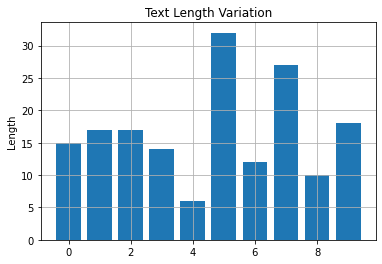

In [ ]:
text_length = [len(i) for i in encoded_text[:10]]
plt.bar([i for i in range(10)], text_length)
plt.title('Text Length Variation')
plt.ylabel('Length')
plt.grid(True)
plt.show()

In [ ]:
max_length = max(len(x) for x in encoded_text)
max_length

61

In [ ]:
X = pad_sequences(encoded_text, maxlen=max_length, padding='post')
print(X)

[[   80     9  2261 ...     0     0     0]
 [   45    17     8 ...     0     0     0]
 [  963     7    75 ...     0     0     0]
 ...
 [  561 10297    25 ...     0     0     0]
 [ 2370   643   136 ...     0     0     0]
 [    3    96     1 ...     0     0     0]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, np.array(labels), test_size=0.2,random_state=42)

In [ ]:

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(3396, 61) (3396,)
(849, 61) (849,)


In [ ]:
from keras.models import Sequential
from keras import layers 
vec_size = 32

model = Sequential()
model.add(Embedding(vocabs_len, vec_size, input_length=max_length))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
#model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='relu'))
model.add(Dense(len(category), activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 61, 32)            329600    
                                                                 
 conv1d_1 (Conv1D)           (None, 57, 128)           20608     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
 dense_3 (Dense)             (None, 2)                 22        
                                                                 
Total params: 351,520
Trainable params: 351,520
Non-trainable params: 0
________________________________________________

In [ ]:
"""
from keras.models import Sequential
from keras import layers 
vec_size = 32

model = Sequential()
model.add(Embedding(vocabs_len, vec_size, input_length=max_length))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='relu'))
model.add(Dense(len(category), activation='softmax'))
model.summary()
"""

"\nfrom keras.models import Sequential\nfrom keras import layers \nvec_size = 32\n\nmodel = Sequential()\nmodel.add(Embedding(vocabs_len, vec_size, input_length=max_length))\nmodel.add(layers.Conv1D(128, 5, activation='relu'))\nmodel.add(layers.GlobalMaxPooling1D())\nmodel.add(Dropout(0.5))\nmodel.add(layers.Dense(10, activation='relu'))\nmodel.add(Dense(len(category), activation='softmax'))\nmodel.summary()\n"

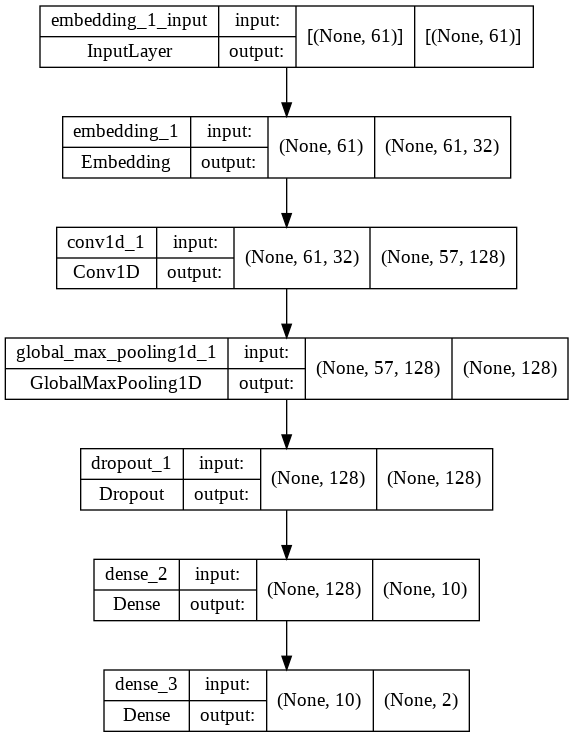

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
import tensorflow as tf
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:

history = model.fit(X_train, y_train, epochs = 5, validation_data=(X_test, y_test))

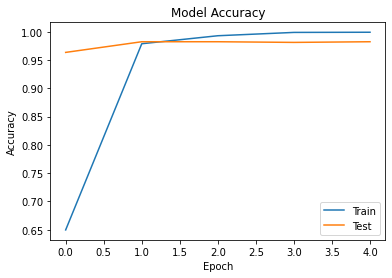

In [ ]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

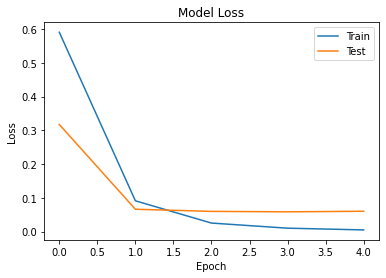

In [ ]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
#model.save('/content/gdrive/MyDrive/MTech-project/classifier.model')

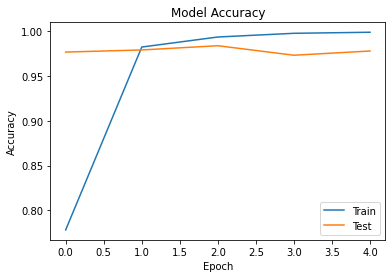

In [ ]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

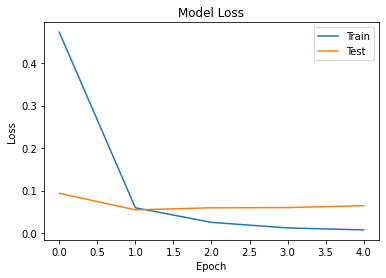

In [ ]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/gdrive/MyDrive/MTech-project/classifier.model')


In [ ]:
test=['this is a happy day']
encoded_test = token.texts_to_sequences(test)
test = pad_sequences(encoded_test, maxlen=max_length, padding='post')
test_predict = model.predict(test)
print(category[int(np.argmax(test_predict[0]))])


0


In [ ]:
test=['this is a happy day but im depressed']
encoded_test = token.texts_to_sequences(test)
test = pad_sequences(encoded_test, maxlen=max_length, padding='post')
test_predict = model.predict(test)
print(category[int(np.argmax(test_predict[0]))])


1


In [ ]:
test=["my life is full of loneliness"]
encoded_test = token.texts_to_sequences(test)
test = pad_sequences(encoded_test, maxlen=max_length, padding='post')
test_predict = model.predict(test)
print(category[int(np.argmax(test_predict[0]))])

1


In [ ]:
test_predict

array([[0.00243589, 0.9975641 ]], dtype=float32)

In [ ]:
data.target.value_counts()

0    2357
1    1888
Name: target, dtype: int64

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/gdrive/MyDrive/MTech-project/classifier.model')


In [ ]:
test=["my life is full of loneliness"]

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

token = Tokenizer()
token.fit_on_texts(test)


In [ ]:
encoded_test = token.texts_to_sequences(test)


In [ ]:
encoded_test

[[1, 2, 3, 4, 5, 6]]

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 61, 32)            329600    
                                                                 
 conv1d (Conv1D)             (None, 57, 128)           20608     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 10)                1290      
                                                                 
 dense_1 (Dense)             (None, 2)                 22        
                                                        

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_length=61
test = pad_sequences(encoded_test, maxlen=max_length, padding='post')

In [ ]:
test_predict = model.predict(test)

In [ ]:
test_predict

array([[9.9947613e-01, 5.2392797e-04]], dtype=float32)

In [ ]:
category=[0,1]

In [ ]:
import numpy as np
print(category[int(np.argmax(test_predict[0]))])

0
